In [8]:
import tensorflow as tf
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

print(tf.__version__)

2.3.0


In [9]:
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [11]:
input_shape = (28, 28, 1)

x_train=x_train.reshape(x_train.shape[0], x_train.shape[1], x_train.shape[2], 1)
x_train=x_train / 255.0
x_test = x_test.reshape(x_test.shape[0], x_test.shape[1], x_test.shape[2], 1)
x_test=x_test/255.0

In [12]:
y_train = tf.one_hot(y_train.astype(np.int32), depth=10)
y_test = tf.one_hot(y_test.astype(np.int32), depth=10)

tf.Tensor([0. 0. 0. 0. 0. 1. 0. 0. 0. 0.], shape=(10,), dtype=float32)


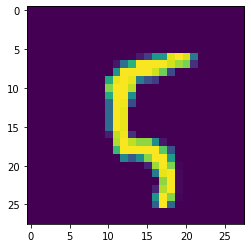

In [13]:
plt.imshow(x_train[100][:,:,0])
print(y_train[100])

In [14]:
batch_size = 64
num_classes = 10
epochs = 5

In [15]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (5,5), padding='same', activation='relu', input_shape=input_shape),
    tf.keras.layers.Conv2D(32, (5,5), padding='same', activation='relu'),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Conv2D(64, (3,3), padding='same', activation='relu'),
    tf.keras.layers.Conv2D(64, (3,3), padding='same', activation='relu'),
    tf.keras.layers.MaxPool2D(strides=(2,2)),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(num_classes, activation='softmax')
])

model.compile(optimizer=tf.keras.optimizers.RMSprop(epsilon=1e-08), loss='categorical_crossentropy', metrics=['acc'])

In [16]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('acc')>0.995):
      print("\nReached 99.5% accuracy so cancelling training!")
      self.model.stop_training = True

callbacks = myCallback()

In [17]:
history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    validation_split=0.1,
                    callbacks=[callbacks])

Epoch 1/5
844/844 [==============================] - 197s 234ms/step - loss: 0.2215 - acc: 0.9306 - val_loss: 0.0570 - val_acc: 0.9845
Epoch 2/5
844/844 [==============================] - 198s 235ms/step - loss: 0.0738 - acc: 0.9786 - val_loss: 0.0262 - val_acc: 0.9928
Epoch 3/5
844/844 [==============================] - 197s 234ms/step - loss: 0.0583 - acc: 0.9838 - val_loss: 0.0305 - val_acc: 0.9922
Epoch 4/5
844/844 [==============================] - 193s 228ms/step - loss: 0.0532 - acc: 0.9851 - val_loss: 0.0321 - val_acc: 0.9922
Epoch 5/5
844/844 [==============================] - 202s 240ms/step - loss: 0.0491 - acc: 0.9867 - val_loss: 0.0263 - val_acc: 0.9930


In [20]:
test_loss, test_acc = model.evaluate(x_test, y_test)

313/313 [==============================] - 9s 29ms/step - loss: 0.0217 - acc: 0.9935
